<a id='synopsis'></a>
# <center><font color=SeaGreen>Projet Crédit Score - Exploration & Nettoyage</font></center>

A partir d'une base de données présentant l'historique financier des clients de Xante Paylater, le but est de classifier les risques de défaut de paiement.

Après avoir importé les données, la compréhension, la visualisation et le nettoyage ont été accomplis pêle-mêle, au fur et à mesure de l'avancement du projet.
<br> Le projet est séparé en deux notebooks : celui-ci puis "Modélisation".

<a id='imports'></a>
# Importer les bibliothèques

In [4]:
#base
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#dataviz
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
%matplotlib inline
import missingno as mno

#transformation
from string import digits
from datetime import timedelta

#analyse statistique
import statistics as st

<a id='data'></a>
# Importer les données

In [5]:
df_train = pd.read_csv('./Train.csv')
df_train.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='eda'></a>
# Comprendre les données

In [6]:
df_train.describe()

#Value et Amount étant très similaires, nous supprimerons Amount

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
count,2.100000e+03,2.100000e+03,2100.0,2100.000000,1.488000e+03,1488.000000,1488.000000,1488.000000
mean,5.302947e+04,-5.291354e+04,256.0,0.708571,1.182725e+04,0.731855,0.982527,0.119624
std,1.539498e+05,1.539653e+05,0.0,0.454529,7.666506e+04,0.443143,0.131070,0.324630
min,1.000000e+02,-2.500000e+06,256.0,0.000000,5.000000e+01,0.000000,0.000000,0.000000
25%,1.000000e+03,-1.200000e+04,256.0,0.000000,1.113750e+03,0.000000,1.000000,0.000000
50%,3.500000e+03,-3.500000e+03,256.0,1.000000,2.800000e+03,1.000000,1.000000,0.000000
75%,1.200000e+04,-1.000000e+03,256.0,1.000000,1.050000e+04,1.000000,1.000000,0.000000
max,2.500000e+06,-1.000000e+02,256.0,1.000000,2.760000e+06,1.000000,1.000000,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2100 non-null   object 
 1   TransactionStartTime   2100 non-null   object 
 2   Value                  2100 non-null   float64
 3   Amount                 2100 non-null   float64
 4   TransactionId          2100 non-null   object 
 5   BatchId                2100 non-null   object 
 6   SubscriptionId         2100 non-null   object 
 7   CurrencyCode           2100 non-null   object 
 8   CountryCode            2100 non-null   int64  
 9   ProviderId             2100 non-null   object 
 10  ProductId              2100 non-null   object 
 11  ProductCategory        2100 non-null   object 
 12  ChannelId              2100 non-null   object 
 13  TransactionStatus      2100 non-null   int64  
 14  IssuedDateLoan         1488 non-null   object 
 15  Amou

Beaucoup de colonnes de types object pourraient être numériques.
<br> La majorité des valeurs manquantes doivent être dues au fait que des prêts ne sont pas accordés, donc les colonnes suivantes ne sont pas renseignées.

In [8]:
df_train.isna().sum()

CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64

In [9]:
df_train["TransactionStatus"].value_counts()
#théorie confirmée

1    1488
0     612
Name: TransactionStatus, dtype: int64

In [10]:
df_train[(df_train["TransactionStatus"] == 1) & (df_train["LoanApplicationId"].isna() == True)]

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
9,CustomerId_258,10/18/2018 16:11,10000.0,-10000.0,TransactionId_1041,BatchId_1970,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_62,10/22/2018 9:13,1.0,InvestorId_3,11/17/2018 16:11,NaN,PayBackId_1791,ThirdPartyId_648,0.0,0.0
10,CustomerId_258,10/18/2018 16:11,10000.0,-10000.0,TransactionId_1041,BatchId_1970,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_62,10/23/2018 7:34,1.0,InvestorId_3,11/17/2018 16:11,NaN,PayBackId_1067,ThirdPartyId_68,0.0,0.0
11,CustomerId_258,10/18/2018 16:11,10000.0,-10000.0,TransactionId_1041,BatchId_1970,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_62,10/25/2018 8:58,1.0,InvestorId_3,11/17/2018 16:11,NaN,PayBackId_928,ThirdPartyId_1883,0.0,0.0
13,CustomerId_233,10/19/2018 10:18,5150.0,-5150.0,TransactionId_1598,BatchId_1458,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_22,10/30/2018 6:50,1.0,InvestorId_3,11/18/2018 10:16,NaN,PayBackId_647,ThirdPartyId_1484,0.0,0.0
14,CustomerId_233,10/19/2018 11:01,515.0,-515.0,TransactionId_2115,BatchId_1672,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_368,10/22/2018 16:11,1.0,InvestorId_3,11/18/2018 11:00,NaN,PayBackId_1267,ThirdPartyId_949,0.0,0.0


In [11]:
df_cust258 = df_train[df_train["CustomerId"] == "CustomerId_258"]
#df_cust258 = df_cust258[df_cust258["TransactionId"] == "TransactionId_1041"]
df_cust258

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
9,CustomerId_258,10/18/2018 16:11,10000.0,-10000.0,TransactionId_1041,BatchId_1970,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_62,10/22/2018 9:13,1.0,InvestorId_3,11/17/2018 16:11,NaN,PayBackId_1791,ThirdPartyId_648,0.0,0.0
10,CustomerId_258,10/18/2018 16:11,10000.0,-10000.0,TransactionId_1041,BatchId_1970,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_62,10/23/2018 7:34,1.0,InvestorId_3,11/17/2018 16:11,NaN,PayBackId_1067,ThirdPartyId_68,0.0,0.0
11,CustomerId_258,10/18/2018 16:11,10000.0,-10000.0,TransactionId_1041,BatchId_1970,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_62,10/25/2018 8:58,1.0,InvestorId_3,11/17/2018 16:11,NaN,PayBackId_928,ThirdPartyId_1883,0.0,0.0
34,CustomerId_258,11/1/2018 15:23,10000.0,-10000.0,TransactionId_710,BatchId_1930,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_430,11/16/2018 12:22,1.0,InvestorId_2,12/1/2018 15:23,LoanApplicationId_1394,PayBackId_654,ThirdPartyId_1180,1.0,0.0
80,CustomerId_258,11/9/2018 18:07,10000.0,-10000.0,TransactionId_1979,BatchId_681,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1601,11/16/2018 12:22,1.0,InvestorId_2,12/9/2018 18:07,LoanApplicationId_374,PayBackId_1133,ThirdPartyId_136,1.0,0.0
82,CustomerId_258,11/10/2018 20:19,5000.0,-5000.0,TransactionId_605,BatchId_1689,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_697,11/16/2018 12:23,1.0,InvestorId_2,12/10/2018 20:19,LoanApplicationId_1349,PayBackId_532,ThirdPartyId_999,1.0,0.0
143,CustomerId_258,11/24/2018 16:06,30000.0,-30000.0,TransactionId_73,BatchId_137,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1268,12/14/2018 8:37,0.0,InvestorId_2,12/24/2018 16:05,LoanApplicationId_833,PayBackId_1515,ThirdPartyId_891,1.0,0.0
144,CustomerId_258,11/24/2018 16:06,30000.0,-30000.0,TransactionId_73,BatchId_137,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1268,12/18/2018 11:49,1.0,InvestorId_2,12/24/2018 16:05,LoanApplicationId_833,PayBackId_1929,ThirdPartyId_1993,1.0,0.0
335,CustomerId_258,12/10/2018 17:10,5000.0,-5000.0,TransactionId_319,BatchId_23,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_349,12/10/2018 17:18,1.0,InvestorId_2,1/9/2019 17:10,LoanApplicationId_1195,PayBackId_1970,ThirdPartyId_1654,1.0,0.0
603,CustomerId_258,1/3/2019 12:08,50000.0,-50000.0,TransactionId_724,BatchId_1045,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1294,1/29/2019 13:37,1.0,InvestorId_2,2/2/2019 12:07,LoanApplicationId_1511,PayBackId_1941,ThirdPartyId_1889,1.0,0.0


Pas de solution pour remplacer ces valeurs manquantes, ce sera donc 0.

In [12]:
df_train[(df_train["TransactionStatus"] == 1) & (df_train["DueDate"].isna() == True)]

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
954,CustomerId_369,2/1/2019 17:23,1000.0,-1000.0,TransactionId_712,BatchId_260,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_943,2/5/2019 11:42,1.0,InvestorId_1,NaN,LoanApplicationId_1085,PayBackId_1045,ThirdPartyId_1317,1.0,0.0
2031,CustomerId_259,3/22/2019 16:45,100000.0,-100000.0,TransactionId_370,BatchId_2290,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1225,4/4/2019 19:36,1.0,InvestorId_2,NaN,LoanApplicationId_813,PayBackId_1170,ThirdPartyId_1904,1.0,0.0


In [13]:
#remplacement des dates d'échéance manquantes par date d'octroi du prêt + 30 jours
df_train["DueDate"][(df_train["TransactionStatus"] == 1)
         & (df_train["DueDate"].isna() == True)] = pd.to_datetime(df_train["IssuedDateLoan"]) + timedelta(30)
df_train[(df_train["TransactionStatus"] == 1) & (df_train["DueDate"].isna() == True)]

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted


In [14]:
df_train[(df_train["TransactionStatus"] == 1) & (df_train["ThirdPartyId"].isna() == True)]

#pas de solution de remplacement, ce sera donc 0

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
1630,CustomerId_268,2/27/2019 12:46,192000.0,-192000.0,TransactionId_2069,BatchId_1219,SubscriptionId_6,UGX,256,ProviderId_1,...,LoanId_604,4/5/2019 12:16,1.0,InvestorId_2,3/29/2019 12:46,LoanApplicationId_1251,PayBackId_3,NaN,1.0,1.0
1795,CustomerId_14,3/6/2019 7:48,192000.0,-192000.0,TransactionId_1023,BatchId_1736,SubscriptionId_6,UGX,256,ProviderId_1,...,LoanId_220,5/21/2019 10:45,1.0,InvestorId_2,4/5/2019 7:48,LoanApplicationId_590,PayBackId_2024,NaN,1.0,1.0


In [15]:
df_train["ThirdPartyId"].value_counts()

ThirdPartyId_1090    2
ThirdPartyId_1092    2
ThirdPartyId_1742    2
ThirdPartyId_1149    2
ThirdPartyId_165     2
                    ..
ThirdPartyId_477     1
ThirdPartyId_2041    1
ThirdPartyId_846     1
ThirdPartyId_22      1
ThirdPartyId_1104    1
Name: ThirdPartyId, Length: 1481, dtype: int64

In [16]:
#pourcentage de valeurs manquantes
(df_train.isna().sum() / df_train.shape[0]).sort_values(ascending=False)

LoanApplicationId        0.293810
ThirdPartyId             0.292381
IsDefaulted              0.291429
PaidOnDate               0.291429
IsThirdPartyConfirmed    0.291429
IssuedDateLoan           0.291429
AmountLoan               0.291429
Currency                 0.291429
LoanId                   0.291429
IsFinalPayBack           0.291429
InvestorId               0.291429
DueDate                  0.291429
PayBackId                0.291429
SubscriptionId           0.000000
TransactionStartTime     0.000000
Value                    0.000000
Amount                   0.000000
TransactionId            0.000000
BatchId                  0.000000
TransactionStatus        0.000000
CurrencyCode             0.000000
CountryCode              0.000000
ProviderId               0.000000
ProductId                0.000000
ProductCategory          0.000000
ChannelId                0.000000
CustomerId               0.000000
dtype: float64

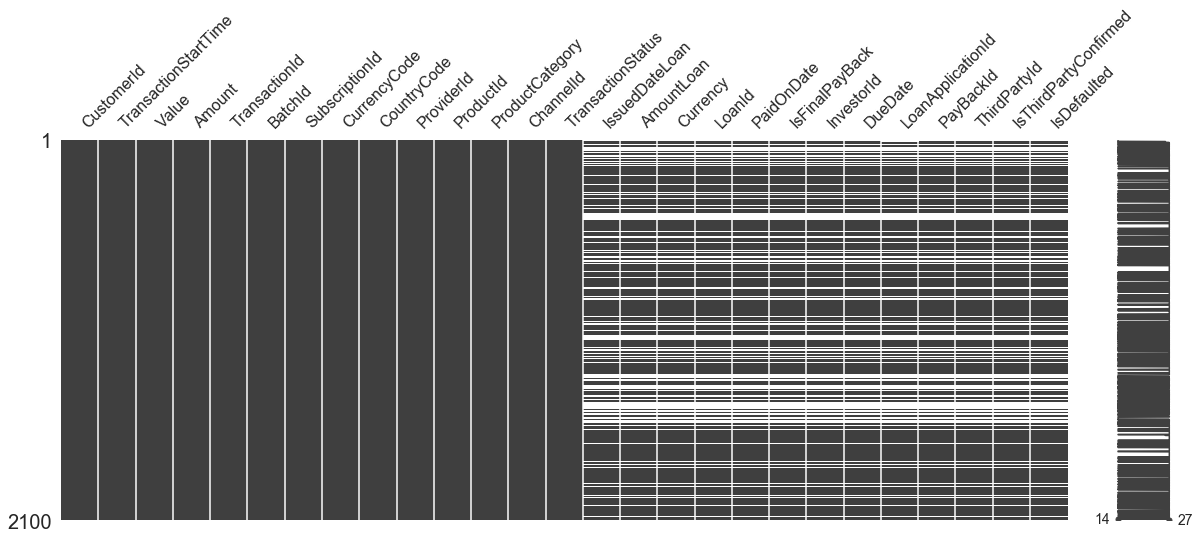

In [17]:
mno.matrix(df_train, figsize=(20,7))

In [18]:
#compte des valeurs uniques
#si 1, suppression de la colonne. Si 2, vérification du contenu (la 2nde valeur est-elle un NaN ?) Si autre, voir + tard)
df_train.nunique()

CustomerId                421
TransactionStartTime     1606
Value                      98
Amount                     77
TransactionId            1758
BatchId                  1713
SubscriptionId              6
CurrencyCode                1
CountryCode                 1
ProviderId                  1
ProductId                  16
ProductCategory             7
ChannelId                   1
TransactionStatus           2
IssuedDateLoan           1101
AmountLoan                647
Currency                    1
LoanId                   1159
PaidOnDate               1427
IsFinalPayBack              2
InvestorId                  3
DueDate                  1103
LoanApplicationId        1156
PayBackId                1485
ThirdPartyId             1481
IsThirdPartyConfirmed       2
IsDefaulted                 2
dtype: int64

<Figure size 720x720 with 0 Axes>

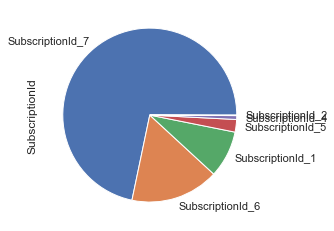

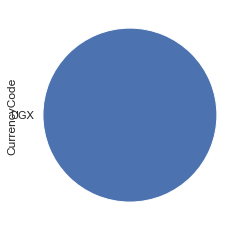

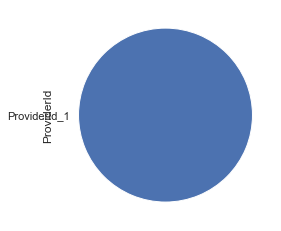

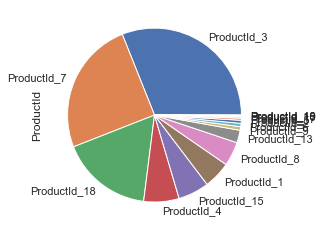

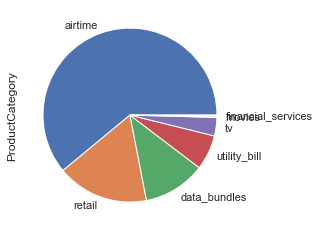

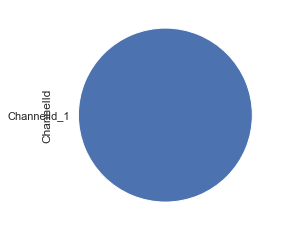

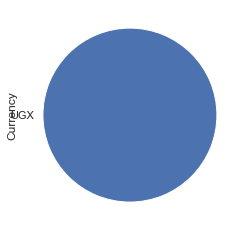

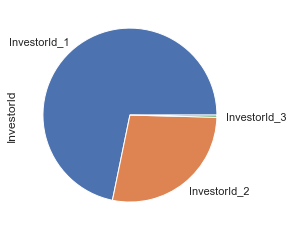

In [16]:
#part des valeurs dans les variables catégoriques
plt.figure(figsize=(10,10))

for col in df_train.select_dtypes('object'):
    if col == 'CustomerId' or col == 'TransactionStartTime' or col == 'TransactionId' or col == 'PaidOnDate' or col == 'LoanId' or col == 'ThirdPartyId' or col == 'PayBackId' or col == 'LoanApplicationId' or col == 'IssuedDateLoan' or col == 'BatchId'or col == 'DueDate':
        None
    else:
        plt.figure()
        df_train[col].value_counts().plot.pie()

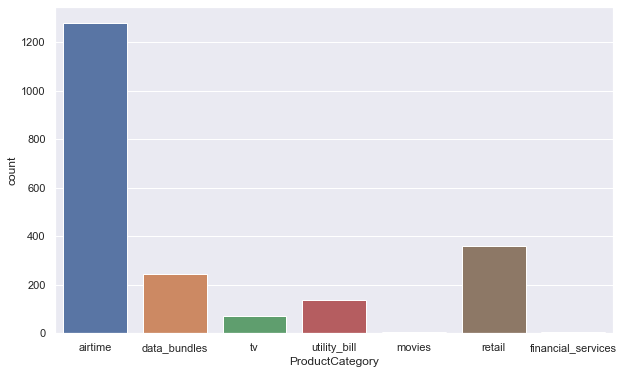

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["ProductCategory"])

airtime = temps d'antenne
<br> data_bundles = lots de données
<br> tv = télévision
<br> utility_bill = factures de service public
<br> movies = films
<br> retail = vente au détail
<br> financial_services = services financiers

Au vu des catégories citées, il devient clair que la start-up Xente vend des services à destination des professionnels.

In [18]:
df_train["ProductId"].value_counts()

ProductId_3     652
ProductId_7     523
ProductId_18    358
ProductId_4     138
ProductId_15    121
ProductId_1     106
ProductId_8      94
ProductId_13     49
ProductId_9      14
ProductId_6      13
ProductId_2      12
ProductId_5       8
ProductId_17      5
ProductId_10      4
ProductId_19      2
ProductId_16      1
Name: ProductId, dtype: int64

In [19]:
df_train["ProductCategory"].value_counts()

airtime               1281
retail                 358
data_bundles           244
utility_bill           136
tv                      72
movies                   5
financial_services       4
Name: ProductCategory, dtype: int64

In [20]:
for i in df_train["ProductCategory"].unique():
    print(i,"\n", df_train['ProductId'][df_train['ProductCategory'] == i].value_counts(), "\n")

airtime 
 ProductId_3    652
ProductId_7    523
ProductId_1    106
Name: ProductId, dtype: int64 

data_bundles 
 ProductId_4    138
ProductId_8     94
ProductId_2     12
Name: ProductId, dtype: int64 

tv 
 ProductId_13    49
ProductId_6     13
ProductId_5      8
ProductId_19     2
Name: ProductId, dtype: int64 

utility_bill 
 ProductId_15    121
ProductId_9      14
ProductId_16      1
Name: ProductId, dtype: int64 

movies 
 ProductId_17    5
Name: ProductId, dtype: int64 

retail 
 ProductId_18    358
Name: ProductId, dtype: int64 

financial_services 
 ProductId_10    4
Name: ProductId, dtype: int64 



Chaque ProductId est affilié à une seule catégorie de produits.
<br> Choix à faire : garder les deux ou un seul (mais lequel ?)

In [21]:
df_train["Currency"].value_counts()
#la seconde valeur unique est un NaN, on peut supprimer

UGX    1488
Name: Currency, dtype: int64

In [22]:
df_test = pd.read_csv('./Test.csv')
df_test.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,3/31/2019 13:33,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 13:33,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,3/31/2019 15:04,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,3/31/2019 15:04,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,3/31/2019 17:31,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:31,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,3/31/2019 17:32,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:32,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,3/31/2019 17:34,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:34,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302


Différences de colonnes entre les deux datasets

In [23]:
list(set(df_train.columns) - set(df_test.columns))

['IsThirdPartyConfirmed',
 'AmountLoan',
 'IsDefaulted',
 'IsFinalPayBack',
 'DueDate',
 'PayBackId',
 'Currency',
 'PaidOnDate']

In [24]:
df_test.nunique()

CustomerId              174
TransactionStartTime    884
Value                    91
Amount                   79
TransactionId           903
BatchId                 873
SubscriptionId            4
CurrencyCode              1
CountryCode               1
ProviderId                1
ProductId                18
ProductCategory           8
ChannelId                 1
TransactionStatus         2
IssuedDateLoan          470
LoanId                  478
InvestorId                2
LoanApplicationId       478
ThirdPartyId            478
dtype: int64

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            905 non-null    object 
 1   TransactionStartTime  905 non-null    object 
 2   Value                 905 non-null    float64
 3   Amount                905 non-null    float64
 4   TransactionId         905 non-null    object 
 5   BatchId               905 non-null    object 
 6   SubscriptionId        905 non-null    object 
 7   CurrencyCode          905 non-null    object 
 8   CountryCode           905 non-null    int64  
 9   ProviderId            905 non-null    object 
 10  ProductId             905 non-null    object 
 11  ProductCategory       905 non-null    object 
 12  ChannelId             905 non-null    object 
 13  TransactionStatus     905 non-null    int64  
 14  IssuedDateLoan        478 non-null    object 
 15  LoanId                4

In [26]:
df_test.isna().sum()

#ici les nan sont les crédits refusés

CustomerId                0
TransactionStartTime      0
Value                     0
Amount                    0
TransactionId             0
BatchId                   0
SubscriptionId            0
CurrencyCode              0
CountryCode               0
ProviderId                0
ProductId                 0
ProductCategory           0
ChannelId                 0
TransactionStatus         0
IssuedDateLoan          427
LoanId                  427
InvestorId              427
LoanApplicationId       427
ThirdPartyId            427
dtype: int64

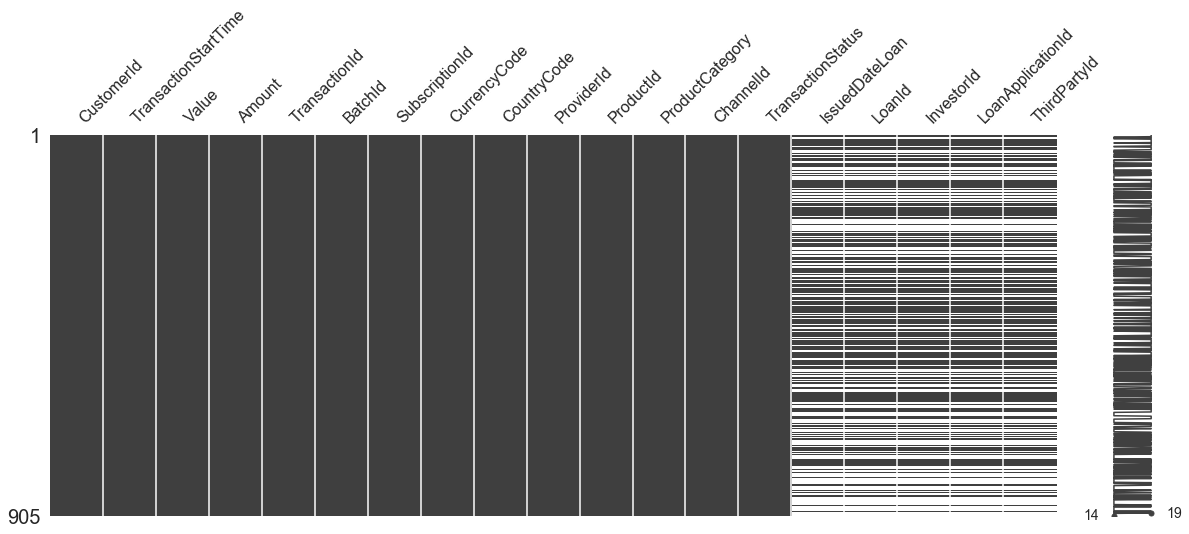

In [27]:
mno.matrix(df_test, figsize=(20,7))

Dernières vérifications sur la colonne "Amount" avant suppression
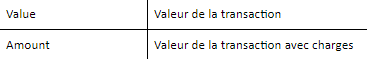

In [28]:
np.mean(df_train["Amount"] + df_train["Value"])

115.93619047619048

In [29]:
(df_train["Amount"] + df_train["Value"]).value_counts()

0.0       1938
1200.0      42
750.0       25
3500.0      13
1800.0      12
330.0        8
1590.0       8
660.0        6
720.0        5
2900.0       5
840.0        4
645.0        3
1560.0       3
3450.0       3
6300.0       2
630.0        2
675.0        2
2750.0       2
360.0        2
3200.0       2
690.0        1
2660.0       1
1110.0       1
3050.0       1
1589.0       1
990.0        1
4000.0       1
1170.0       1
1740.0       1
636.0        1
1080.0       1
2000.0       1
926.0        1
dtype: int64

Effectivement, les différences sont minimes entre ces deux colonnes.
<br> Drop des colonnes à valeur unique + Amount

<a id='nettoyage'></a>
# Nettoyage & transformation des données

In [19]:
df_col_dropped = df_train.copy()
df_col_dropped.drop(["Amount", "CurrencyCode", "CountryCode","Currency",
                     "ProviderId", "ChannelId"], axis=1, inplace=True)
df_col_dropped.head()

,CustomerId,TransactionStartTime,Value,TransactionId,BatchId,SubscriptionId,ProductId,ProductCategory,TransactionStatus,IssuedDateLoan,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,ProductId_7,airtime,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,ProductId_7,airtime,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,ProductId_7,airtime,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,ProductId_7,airtime,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,ProductId_7,airtime,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_col_dropped.columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'TransactionId',
       'BatchId', 'SubscriptionId', 'ProductId', 'ProductCategory',
       'TransactionStatus', 'IssuedDateLoan', 'AmountLoan', 'LoanId',
       'PaidOnDate', 'IsFinalPayBack', 'InvestorId', 'DueDate',
       'LoanApplicationId', 'PayBackId', 'ThirdPartyId',
       'IsThirdPartyConfirmed', 'IsDefaulted'],
      dtype='object')

Drop des lignes contenant des valeurs manquantes (ici principalement des crédits refusés, donc aucune information à en tirer concernant des défauts de remboursement)

In [21]:
df_type_transform = df_col_dropped.copy()

Extraction des données numériques des valeurs strings qui n'ont pas lieu de l'être

In [22]:
columns_to_num = ["CustomerId", "TransactionId", "BatchId", "SubscriptionId", "ProductId",
                  "LoanId", "InvestorId", "LoanApplicationId", "PayBackId", "ThirdPartyId"]

def to_num(df):
    for column in columns_to_num:
        df[column] = df[column].str.extract('(\d+)', expand=False).astype(int, errors="ignore")
        
to_num(df_type_transform)

Passage des dates en format adapté

In [23]:
df_type_transform["TransactionStartTime"] = pd.to_datetime(df_type_transform["TransactionStartTime"]).dt.date
df_type_transform["IssuedDateLoan"] = pd.to_datetime(df_type_transform["IssuedDateLoan"]).dt.date
df_type_transform["PaidOnDate"] = pd.to_datetime(df_type_transform["PaidOnDate"]).dt.date
df_type_transform["DueDate"] = pd.to_datetime(df_type_transform["DueDate"]).dt.date
df_type_transform["TransactionStartTime"] = pd.to_datetime(df_type_transform["TransactionStartTime"])
df_type_transform["IssuedDateLoan"] = pd.to_datetime(df_type_transform["IssuedDateLoan"])
df_type_transform["PaidOnDate"] = pd.to_datetime(df_type_transform["PaidOnDate"])
df_type_transform["DueDate"] = pd.to_datetime(df_type_transform["DueDate"])
df_type_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CustomerId             2100 non-null   int32         
 1   TransactionStartTime   2100 non-null   datetime64[ns]
 2   Value                  2100 non-null   float64       
 3   TransactionId          2100 non-null   int32         
 4   BatchId                2100 non-null   int32         
 5   SubscriptionId         2100 non-null   int32         
 6   ProductId              2100 non-null   int32         
 7   ProductCategory        2100 non-null   object        
 8   TransactionStatus      2100 non-null   int64         
 9   IssuedDateLoan         1488 non-null   datetime64[ns]
 10  AmountLoan             1488 non-null   float64       
 11  LoanId                 1488 non-null   object        
 12  PaidOnDate             1488 non-null   datetime64[ns]
 13  IsF

In [24]:
df_type_transform["InvestorId"] = pd.to_numeric(df_type_transform["InvestorId"], errors='coerce').fillna(0)
df_type_transform["LoanId"] = pd.to_numeric(df_type_transform["LoanId"], errors='coerce').fillna(0)
df_type_transform["LoanApplicationId"] = pd.to_numeric(df_type_transform["LoanApplicationId"], errors='coerce').fillna(0)
df_type_transform["PayBackId"] = pd.to_numeric(df_type_transform["PayBackId"], errors='coerce').fillna(0)
df_type_transform["ThirdPartyId"] = pd.to_numeric(df_type_transform["ThirdPartyId"], errors='coerce').fillna(0)

In [25]:
df_type_transform.InvestorId.value_counts()

1.0    1068
0.0     612
2.0     414
3.0       6
Name: InvestorId, dtype: int64

In [26]:
df_type_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CustomerId             2100 non-null   int32         
 1   TransactionStartTime   2100 non-null   datetime64[ns]
 2   Value                  2100 non-null   float64       
 3   TransactionId          2100 non-null   int32         
 4   BatchId                2100 non-null   int32         
 5   SubscriptionId         2100 non-null   int32         
 6   ProductId              2100 non-null   int32         
 7   ProductCategory        2100 non-null   object        
 8   TransactionStatus      2100 non-null   int64         
 9   IssuedDateLoan         1488 non-null   datetime64[ns]
 10  AmountLoan             1488 non-null   float64       
 11  LoanId                 2100 non-null   float64       
 12  PaidOnDate             1488 non-null   datetime64[ns]
 13  IsF

In [27]:
df_type_transform.to_csv("./df_train_almost_clean.csv", sep=",", index=False)

Colonne restée en object : ProductCategory -> get_dummies nécessaire

In [38]:
df_type_transform = pd.get_dummies(df_type_transform)
df_type_transform.columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'TransactionId',
       'BatchId', 'SubscriptionId', 'ProductId', 'TransactionStatus',
       'IssuedDateLoan', 'AmountLoan', 'LoanId', 'PaidOnDate',
       'IsFinalPayBack', 'InvestorId', 'DueDate', 'LoanApplicationId',
       'PayBackId', 'ThirdPartyId', 'IsThirdPartyConfirmed', 'IsDefaulted',
       'ProductCategory_airtime', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_retail', 'ProductCategory_tv',
       'ProductCategory_utility_bill'],
      dtype='object')

In [39]:
df_type_transform.head()

,CustomerId,TransactionStartTime,Value,TransactionId,BatchId,SubscriptionId,ProductId,TransactionStatus,IssuedDateLoan,AmountLoan,...,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill
0,27,2018-09-21,550.0,1683,641,2,7,0,NaT,NaN,...,0.0,NaN,NaN,1,0,0,0,0,0,0
1,27,2018-09-25,550.0,2235,820,2,7,0,NaT,NaN,...,0.0,NaN,NaN,1,0,0,0,0,0,0
2,27,2018-09-25,550.0,1053,210,4,7,0,NaT,NaN,...,0.0,NaN,NaN,1,0,0,0,0,0,0
3,27,2018-09-27,1000.0,2633,876,4,7,0,NaT,NaN,...,0.0,NaN,NaN,1,0,0,0,0,0,0
4,27,2018-09-27,500.0,71,1362,4,7,0,NaT,NaN,...,0.0,NaN,NaN,1,0,0,0,0,0,0


In [40]:
df_type_transform.describe()
#ne prend pas en compte les dates

,CustomerId,Value,TransactionId,BatchId,SubscriptionId,ProductId,TransactionStatus,AmountLoan,LoanId,IsFinalPayBack,...,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill
count,2100.000000,2.100000e+03,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,1.488000e+03,2100.000000,1488.000000,...,2100.000000,1488.000000,1488.000000,2100.000000,2100.00000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,263.420952,5.302947e+04,1333.366190,1326.747619,6.240000,7.795238,0.708571,1.182725e+04,560.929048,0.731855,...,736.183333,0.982527,0.119624,0.610000,0.11619,0.001905,0.002381,0.170476,0.034286,0.064762
std,136.135627,1.539498e+05,756.187829,775.842056,1.704887,5.707995,0.454529,7.666506e+04,537.074107,0.443143,...,686.719451,0.131070,0.324630,0.487866,0.32053,0.043612,0.048748,0.376140,0.182005,0.246164
min,1.000000,1.000000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,155.000000,1.000000e+03,697.750000,647.750000,6.000000,3.000000,0.000000,1.113750e+03,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,274.000000,3.500000e+03,1331.500000,1311.500000,7.000000,7.000000,1.000000,2.800000e+03,429.500000,1.000000,...,631.500000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,390.000000,1.200000e+04,1991.250000,2016.250000,7.000000,13.000000,1.000000,1.050000e+04,1032.500000,1.000000,...,1359.250000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,503.000000,2.500000e+06,2660.000000,2585.000000,7.000000,19.000000,1.000000,2.760000e+06,1638.000000,1.000000,...,2041.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Parts des défauts de remboursement vs les remboursements effectués dans les délais

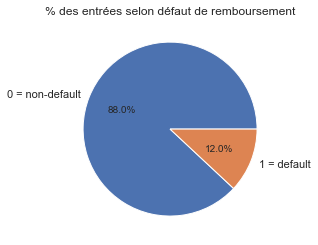

In [41]:
plt.pie(df_type_transform.IsDefaulted.value_counts(), labels = ["0 = non-default","1 = default"], autopct='%1.1f%%') 
plt.title("% des entrées selon défaut de remboursement");

0.0    1310
1.0     178
Name: IsDefaulted, dtype: int64

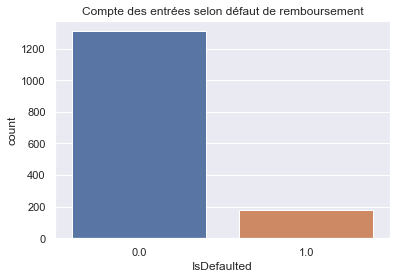

In [42]:
sns.countplot(df_type_transform["IsDefaulted"])
plt.title("Compte des entrées selon défaut de remboursement");
df_type_transform["IsDefaulted"].value_counts()

Un équilibrage des données est nécessaire (ce sera fait dans le second notebook)

In [43]:
# Réorganisation de l'ordre des colonnes

df_reordered = df_type_transform.copy()
target = df_type_transform["IsDefaulted"]
df_reordered.drop(["IsDefaulted"], axis=1, inplace=True)
df_analysis = pd.merge(df_reordered, target, right_on=target.index, left_on=df_reordered.index, left_index=True)

df_analysis.drop(["key_0"], axis=1, inplace=True)
df_analysis.head()

,CustomerId,TransactionStartTime,Value,TransactionId,BatchId,SubscriptionId,ProductId,TransactionStatus,IssuedDateLoan,AmountLoan,...,ThirdPartyId,IsThirdPartyConfirmed,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill,IsDefaulted
0,27,2018-09-21,550.0,1683,641,2,7,0,NaT,NaN,...,0.0,NaN,1,0,0,0,0,0,0,NaN
1,27,2018-09-25,550.0,2235,820,2,7,0,NaT,NaN,...,0.0,NaN,1,0,0,0,0,0,0,NaN
2,27,2018-09-25,550.0,1053,210,4,7,0,NaT,NaN,...,0.0,NaN,1,0,0,0,0,0,0,NaN
3,27,2018-09-27,1000.0,2633,876,4,7,0,NaT,NaN,...,0.0,NaN,1,0,0,0,0,0,0,NaN
4,27,2018-09-27,500.0,71,1362,4,7,0,NaT,NaN,...,0.0,NaN,1,0,0,0,0,0,0,NaN


Maintenant que toutes les features ont été transformées de manière à ne plus être de type "object", on peut les analyser.

In [44]:
def mass_distplot(df1, df):
    for column in df1:
            sns.distplot(
                df[df["IsDefaulted"] == 1][column],
                bins=50, color="blue", kde=False)
            sns.distplot(
                df[df["IsDefaulted"] == 0][column],
                bins=50, color="yellow", kde=False)
            plt.legend(['Défaut de paiement', 'Sans défaut'])
            plt.title(column + "\n", size=20)
            plt.show()

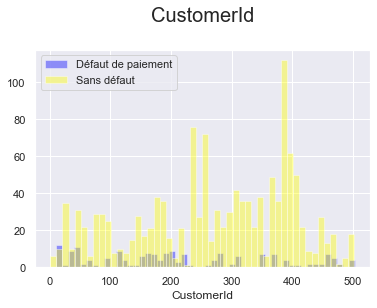

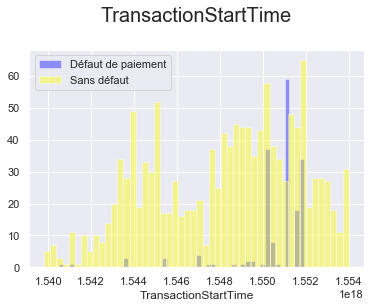

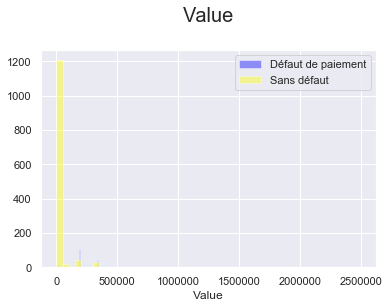

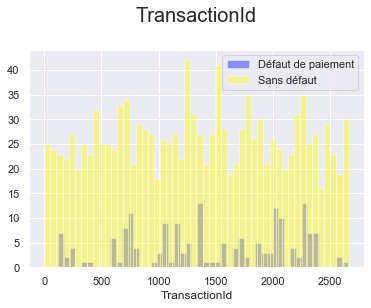

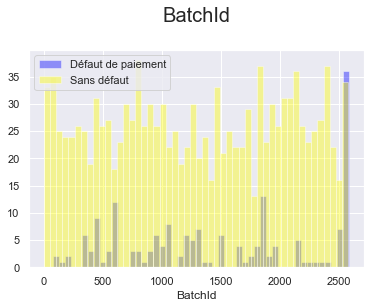

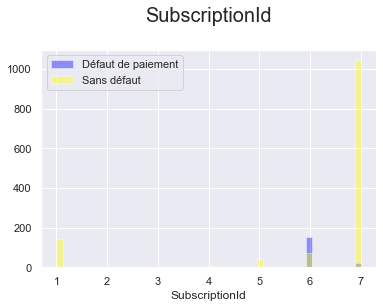

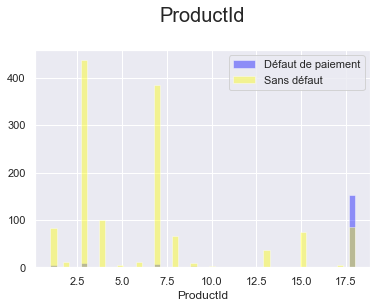

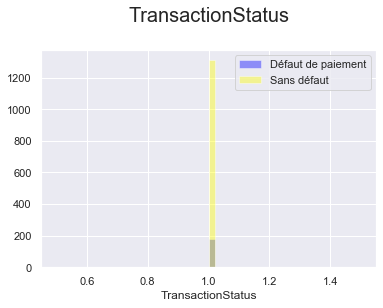

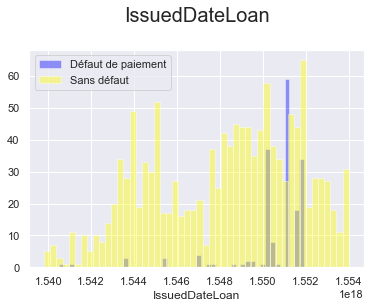

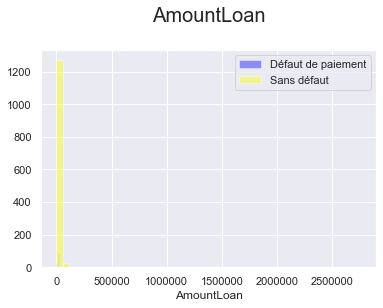

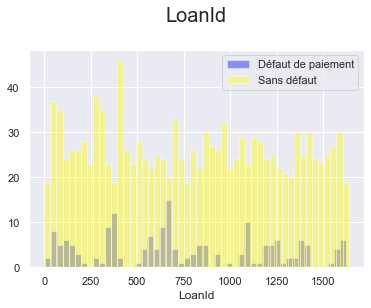

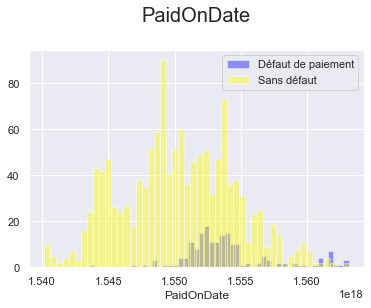

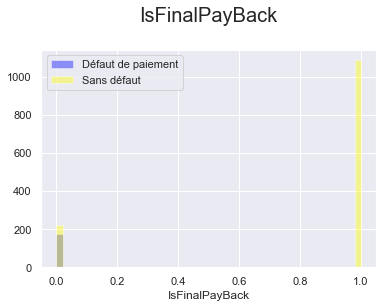

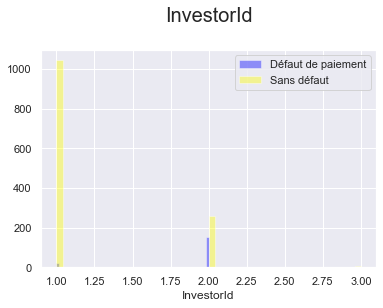

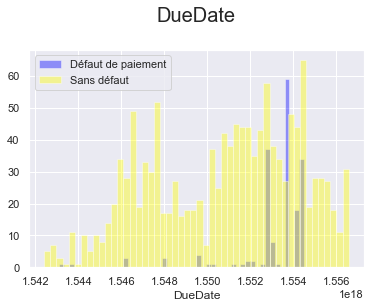

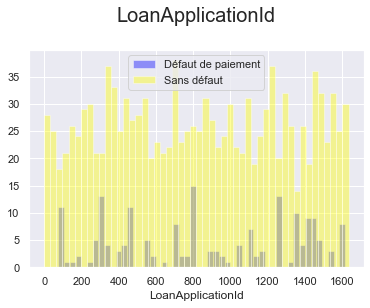

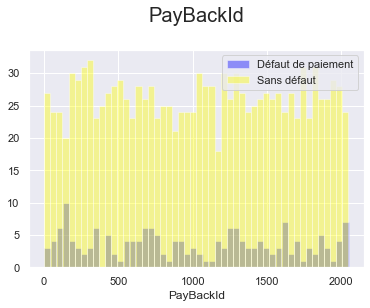

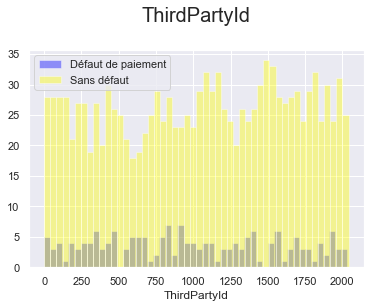

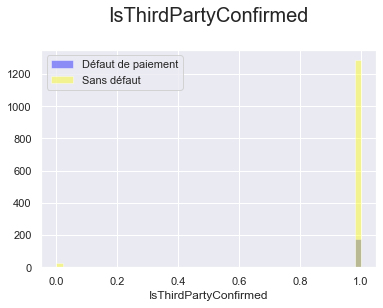

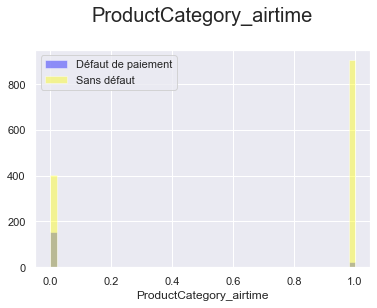

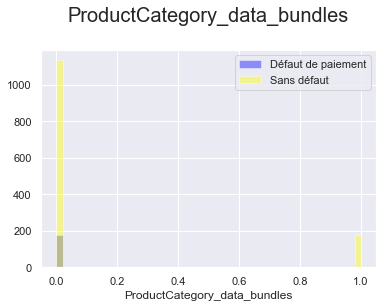

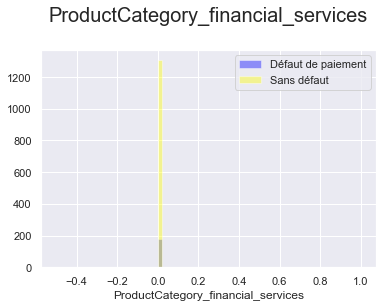

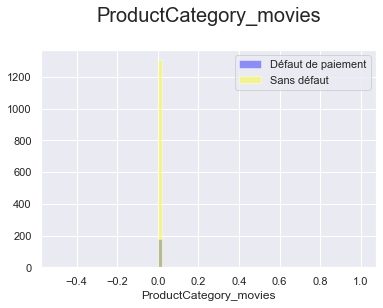

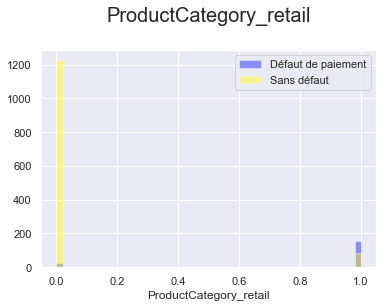

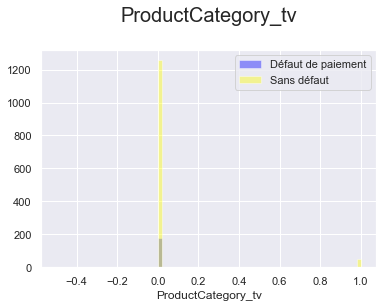

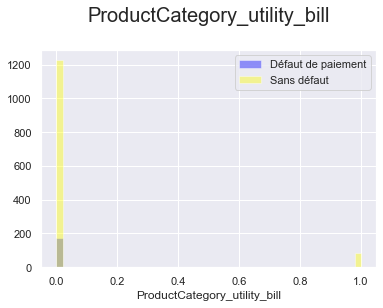

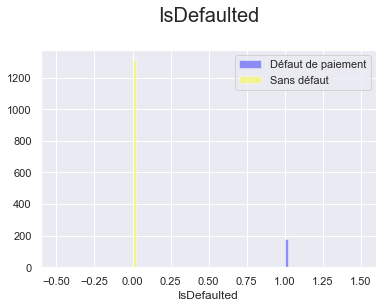

In [45]:
mass_distplot(df_analysis.columns, df_analysis)

- Pic temporel d'impayés (visible sur les colonnes sous format DateTime)
- Montants concernés : majorité de - de 400k

Pas de distplot sur les colonnes suivantes :

xxxxId -> Inutile
<br>TransactionsStatus -> Inutile, que des 1

Que des valeurs à 0 et 1 :
<br>IsFinalPayBack
<br>IsThirdPartyConfirmed
<br>ProductCategory_airtime
<br>ProductCategory_data_bundles
<br>ProductCategory_financial_services
<br>ProductCategory_movies
<br>ProductCategory_retail
<br>ProductCategory_tv
<br>ProductCategory_utility_bill

###### Passage de la colonne PaybackId en index annulé.

<a id='analyses'></a>
### Analyses

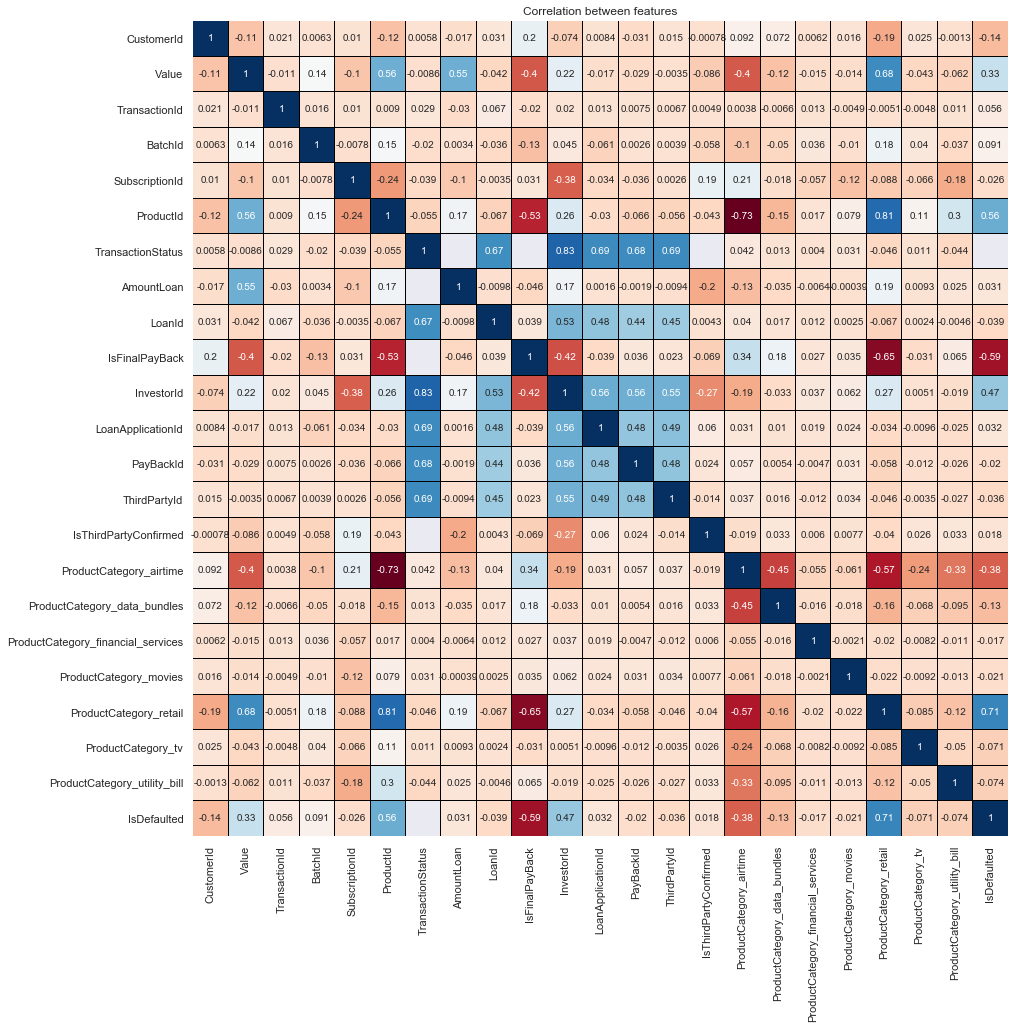

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(df_analysis.corr() , annot=True , cbar=False ,linewidths=0.01 ,square=True, cmap='RdBu',linecolor="black")
plt.title('Correlation between features');

Corrélation positive entre "IsDefaulted" (target) et :
- Value (33%)
- InvestorId (48%)
- ProductId (56%)
- ProductCategory_retail (70%)

Voyons cela de plus près

In [47]:
print("Statistiques des transactions dont les crédits ont été remboursés à temps")
print("moyenne Value", round(df_analysis["Value"][df_analysis["IsDefaulted"] == 0].mean()))
print("mode InvestorId", st.mode(df_analysis["InvestorId"][df_analysis["IsDefaulted"] == 0]))
print("mode ProductId", st.mode(df_analysis["ProductId"][df_analysis["IsDefaulted"] == 0]))
print("moyenne ProductCategory_retail", round(df_analysis["ProductCategory_retail"][df_analysis["IsDefaulted"] == 0].mean(), 2))

Statistiques des transactions dont les crédits ont été remboursés à temps
moyenne Value 31663
mode InvestorId 1.0
mode ProductId 3
moyenne ProductCategory_retail 0.06


In [48]:
print("Statistiques des transactions dont les crédits ont été remboursés en retard")
print("moyenne Value", round(df_analysis["Value"][df_analysis["IsDefaulted"] == 1].mean()))
print("mode InvestorId", st.mode(df_analysis["InvestorId"][df_analysis["IsDefaulted"] == 1]))
print("mode ProductId", st.mode(df_analysis["ProductId"][df_analysis["IsDefaulted"] == 1]))
print("moyenne ProductCategory_retail", round(df_analysis["ProductCategory_retail"][df_analysis["IsDefaulted"] == 1].mean(), 2))

Statistiques des transactions dont les crédits ont été remboursés en retard
moyenne Value 203184
mode InvestorId 2.0
mode ProductId 18
moyenne ProductCategory_retail 0.86


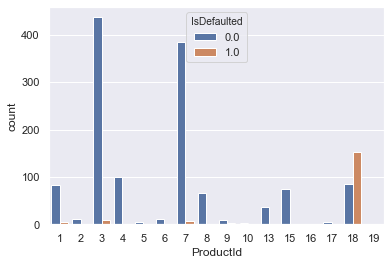

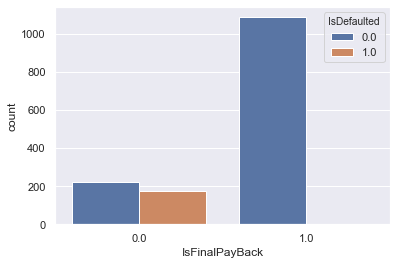

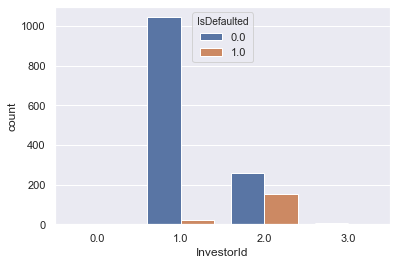

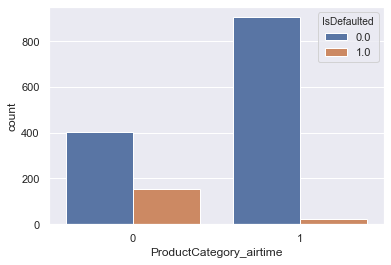

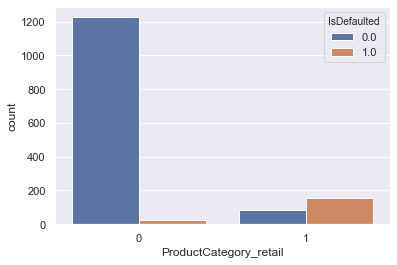

In [49]:
# Visualisation des features repérées précemment par des countplot / target.

tab_categorical = ['ProductId','IsFinalPayBack', 'InvestorId', 'ProductCategory_airtime',
       'ProductCategory_retail']
 
fig,axes = plt.subplots()
for idx,cat_col in enumerate(tab_categorical):
    sns.countplot(x=cat_col,data=df_analysis,hue='IsDefaulted')

    plt.show()

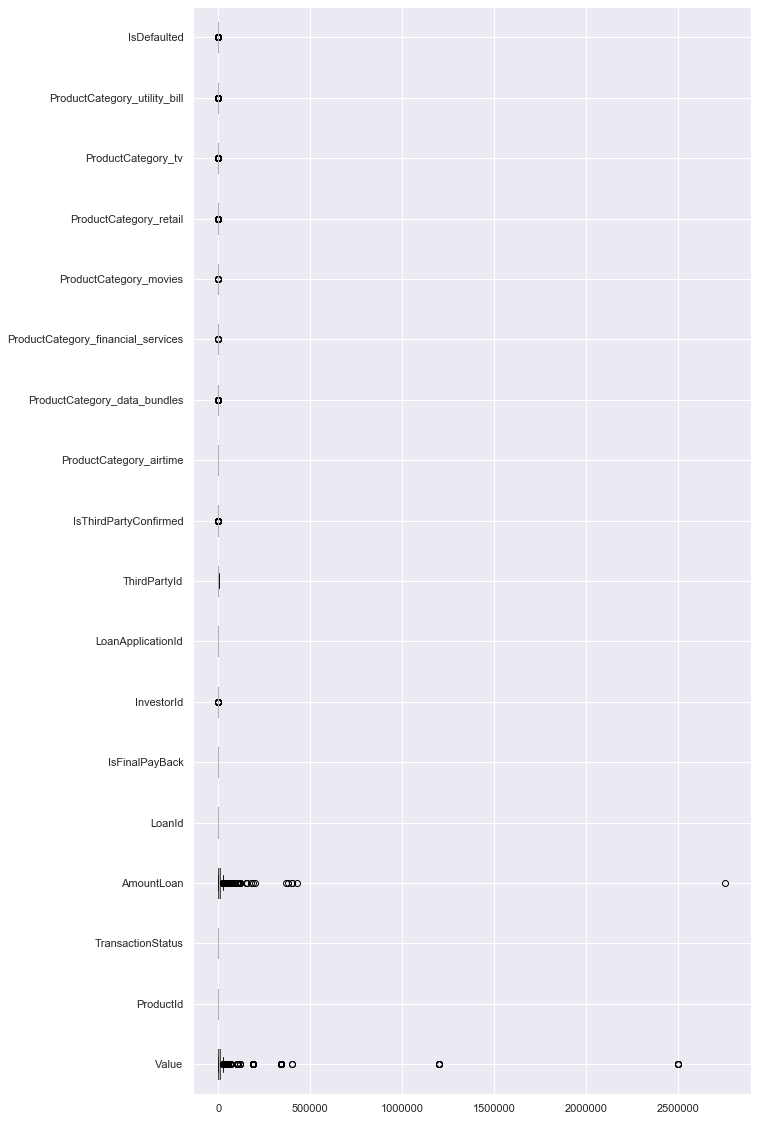

In [50]:
#recherche des outliers

df_values = df_analysis.copy()
df_values.drop(['TransactionStartTime', 'IssuedDateLoan', 'PaidOnDate', 'DueDate'], axis=1, inplace=True)
df_values.drop(['CustomerId', 'TransactionId', 'BatchId', 'SubscriptionId', 'PayBackId'], axis=1, inplace=True)
"""
for column in df_values :
            sns.boxplot(df_values[column])
            plt.title(column + "\n")
            plt.show()
            """
plt.figure(figsize=(10,20))
df_values.boxplot(vert=False)

In [51]:
df_analysis[["Value", "AmountLoan"]].describe()

,Value,AmountLoan
count,2.100000e+03,1.488000e+03
mean,5.302947e+04,1.182725e+04
std,1.539498e+05,7.666506e+04
min,1.000000e+02,5.000000e+01
25%,1.000000e+03,1.113750e+03
50%,3.500000e+03,2.800000e+03
75%,1.200000e+04,1.050000e+04
max,2.500000e+06,2.760000e+06


In [52]:
df_analysis[["CustomerId", "TransactionStartTime", "TransactionId", "ProductId", "ThirdPartyId",
             "Value", "InvestorId", "AmountLoan", "PaidOnDate"]][df_analysis["Value"] >= 500000]

,CustomerId,TransactionStartTime,TransactionId,ProductId,ThirdPartyId,Value,InvestorId,AmountLoan,PaidOnDate
1761,305,2019-03-05,843,18,2021.0,2500000.0,2.0,89000.0,2019-04-10
1762,305,2019-03-05,843,18,1280.0,2500000.0,2.0,200000.0,2019-04-10
1763,305,2019-03-05,843,18,686.0,2500000.0,2.0,120000.0,2019-05-10
1764,305,2019-03-05,843,18,672.0,2500000.0,2.0,2760000.0,2019-06-26
1767,254,2019-03-05,1374,18,1742.0,1200000.0,2.0,370000.0,2019-03-07
1768,254,2019-03-05,1374,18,1742.0,1200000.0,2.0,400000.0,2019-03-07
1769,254,2019-03-05,1374,18,1669.0,1200000.0,2.0,400000.0,2019-05-08
1770,254,2019-03-05,1374,18,15.0,1200000.0,2.0,428400.0,2019-06-05
2027,335,2019-03-22,2457,18,0.0,1200000.0,0.0,NaN,NaT


Les outliers de la colonne "Value" concernent les deux mêmes clients, qui ont effectué une demande de crédit sur la même transaction et l'ont remboursé en plusieurs fois ("ThirdPartyId" = n° de remboursement).
<br>A priori rien de choquant, à part peut-être le fait que le montant total des prêts est plus élevé que le prix de la transaction. -> Intérêts ?
<br>Ces transactions concernent l'achat de produits au détail (ProductId 18 = retail)

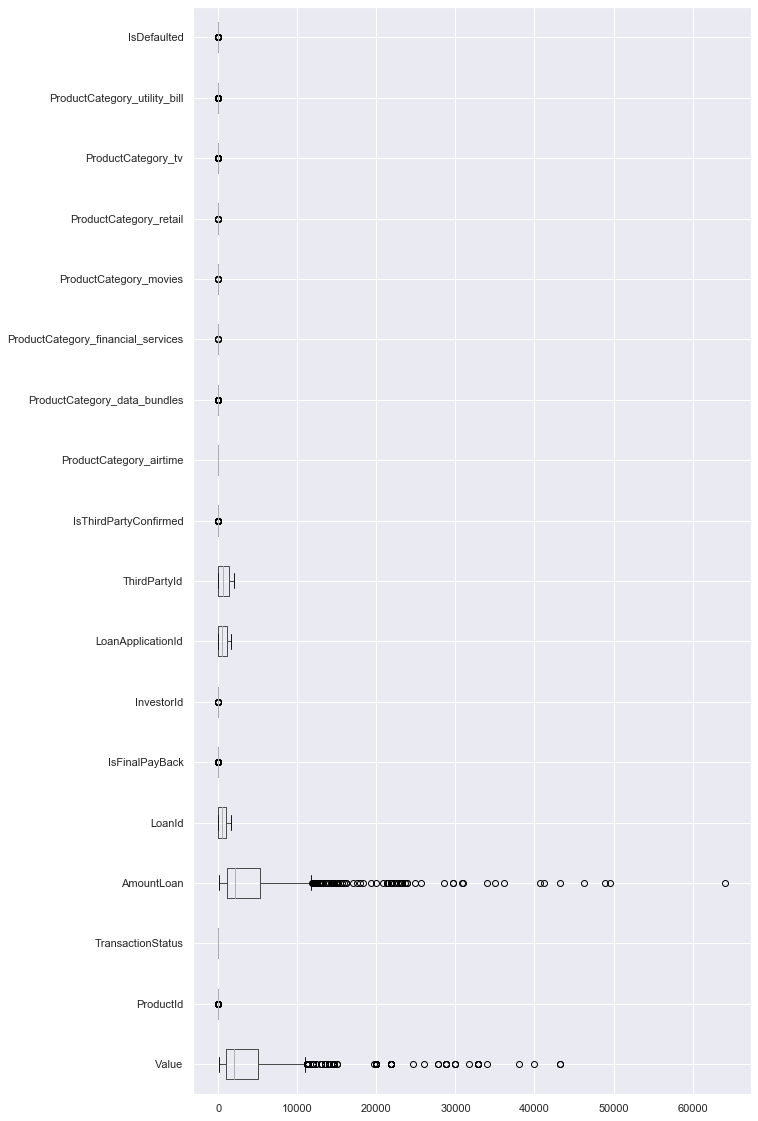

In [53]:
#recherche des outliers

df_values = df_analysis.copy()
df_values.drop(['TransactionStartTime', 'IssuedDateLoan', 'PaidOnDate', 'DueDate'], axis=1, inplace=True)
df_values.drop(['CustomerId', 'TransactionId', 'BatchId', 'SubscriptionId', 'PayBackId'], axis=1, inplace=True)
"""
for column in df_values :
            sns.boxplot(df_values[column])
            plt.title(column + "\n")
            plt.show()
            """
plt.figure(figsize=(10,20))
df_values[df_values["Value"] < 50000].boxplot(vert=False)

75% des transactions concernent des valeurs entre 0 et 12000 shillings ougandais

<a id='retards'></a>
# Remboursements en retard (deltas entre colonnes datetime)

In [54]:
df_analysis_default = df_analysis.copy()
df_analysis_default = df_analysis_default[df_analysis_default["IsDefaulted"] == 1]

In [55]:
df_dtypes = pd.DataFrame(df_analysis_default.dtypes)
df_dtypes = df_dtypes[df_dtypes[0] == "datetime64[ns]"]
df_dtypes

,0
TransactionStartTime,datetime64[ns]
IssuedDateLoan,datetime64[ns]
PaidOnDate,datetime64[ns]
DueDate,datetime64[ns]


In [56]:
(df_analysis_default["IssuedDateLoan"] - df_analysis_default["TransactionStartTime"]).describe()

#prêt accordé au moment de la demande

count                178
mean     0 days 00:00:00
std      0 days 00:00:00
min      0 days 00:00:00
25%      0 days 00:00:00
50%      0 days 00:00:00
75%      0 days 00:00:00
max      0 days 00:00:00
dtype: object

In [57]:
(df_analysis_default["DueDate"] - df_analysis_default["IssuedDateLoan"]).describe()

#30 jours de délai entre l'octroi du prêt et son échéance

count                 178
mean     30 days 00:00:00
std       0 days 00:00:00
min      30 days 00:00:00
25%      30 days 00:00:00
50%      30 days 00:00:00
75%      30 days 00:00:00
max      30 days 00:00:00
dtype: object

A priori les seules colonnes datetime qui nous intéressent sont :

In [58]:
(df_analysis_default["PaidOnDate"] - df_analysis_default["IssuedDateLoan"]).describe()

#jusqu'à 256 jours entre l'octroi du prêt et son remboursement
#compter 30 jours en + (inclus) de délai entre octroi et échéance initiale
#le défaut de remboursement est donc calculé sur cette base (en fait, non)

count                        178
mean     39 days 12:48:32.359550
std      42 days 07:22:34.450536
min              0 days 00:00:00
25%             13 days 00:00:00
50%             26 days 00:00:00
75%             47 days 18:00:00
max            256 days 00:00:00
dtype: object

C'est pourtant le delta entre DueDate et PaidOnDate qui devrait compter si on se réfère à la description des colonnes
<br> DueDate : Date d'échéance du prêt
<br> PaidOnDate : Date à laquelle le prêt a été payé
<br> IssuedDateLoan : Date d'octroi du prêt

In [59]:
(df_analysis_default["PaidOnDate"] - df_analysis_default["DueDate"]).describe()

#jusqu'à 226 jours de retard après l'échéance prévue
#moyenne de 10 jours
#les positifs comptent le délai entre octroi et échéance initiale

count                        178
mean      9 days 12:48:32.359550
std      42 days 07:22:34.450536
min           -30 days +00:00:00
25%           -17 days +00:00:00
50%            -4 days +00:00:00
75%             17 days 18:00:00
max            226 days 00:00:00
dtype: object

<a id='nondefaut'></a>
#### Mêmes recherches sur non default

In [60]:
df_analysis_non_default = df_analysis.copy()
df_analysis_non_default = df_analysis_non_default[df_analysis_non_default["IsDefaulted"] == 0]

(df_analysis_non_default["IssuedDateLoan"] - df_analysis_non_default["TransactionStartTime"]).describe()

count                      1310
mean     0 days 00:01:05.954198
std      0 days 00:39:47.141124
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:00
75%             0 days 00:00:00
max             1 days 00:00:00
dtype: object

In [61]:
(df_analysis_non_default["DueDate"] - df_analysis_non_default["IssuedDateLoan"]).describe()

count                1310
mean     30 days 00:00:00
std       0 days 00:00:00
min      30 days 00:00:00
25%      30 days 00:00:00
50%      30 days 00:00:00
75%      30 days 00:00:00
max      30 days 00:00:00
dtype: object

In [62]:
(df_analysis_non_default["PaidOnDate"] - df_analysis_non_default["IssuedDateLoan"]).describe()

count                       1310
mean     23 days 23:33:37.099236
std      29 days 22:48:49.902736
min              0 days 00:00:00
25%              5 days 00:00:00
50%             14 days 00:00:00
75%             31 days 00:00:00
max            238 days 00:00:00
dtype: object

In [63]:
(df_analysis_non_default["PaidOnDate"] - df_analysis_non_default["DueDate"]).describe()

count                        1310
mean     -7 days +23:33:37.099236
std       29 days 22:48:49.902736
min            -30 days +00:00:00
25%            -25 days +00:00:00
50%            -16 days +00:00:00
75%               1 days 00:00:00
max             208 days 00:00:00
dtype: object

Ceci ne fait pas sens. Je ne comprends pas comment est calculée la target

In [64]:
df_analysis["PaidOnDate"] = pd.to_numeric(df_analysis["PaidOnDate"], errors='coerce').fillna(0)
df_analysis["AmountLoan"] = pd.to_numeric(df_analysis["AmountLoan"], errors='coerce').fillna(0)
df_analysis["PaidOnDate"] = pd.to_numeric(df_analysis["PaidOnDate"], errors='coerce').fillna(0)
df_analysis["DueDate"] = pd.to_numeric(df_analysis["DueDate"], errors='coerce').fillna(0)
df_analysis["IsThirdPartyConfirmed"] = pd.to_numeric(df_analysis["IsThirdPartyConfirmed"], errors='coerce').fillna(0)
df_analysis["IsDefaulted"] = pd.to_numeric(df_analysis["IsDefaulted"], errors='coerce').fillna(0)
df_analysis["IssuedDateLoan"] = pd.to_numeric(df_analysis["IssuedDateLoan"], errors='coerce').fillna(0)
df_analysis["IsFinalPayBack"] = pd.to_numeric(df_analysis["IsFinalPayBack"], errors='coerce').fillna(0)
df_analysis["TransactionStartTime"] = pd.to_numeric(df_analysis["TransactionStartTime"], errors='coerce')

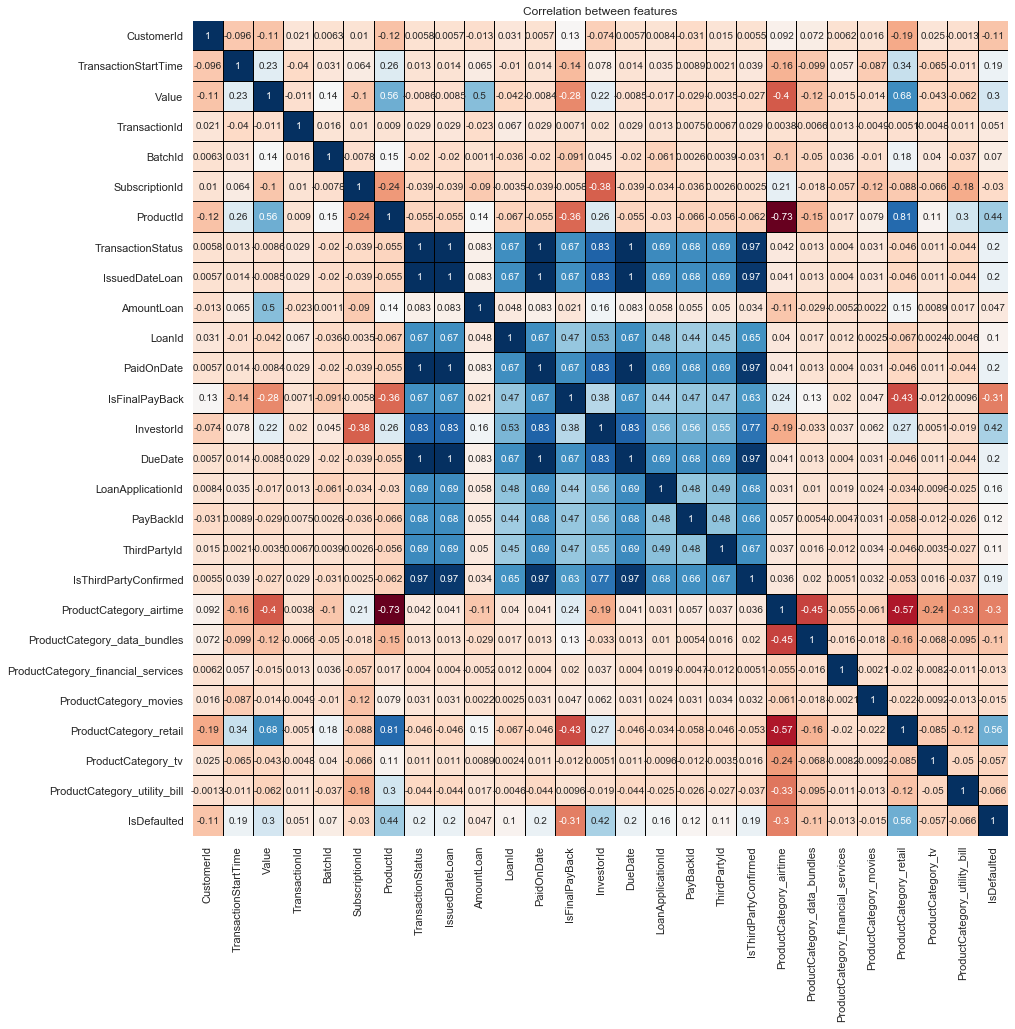

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(df_analysis.corr() , annot=True , cbar=False ,linewidths=0.01 ,square=True, cmap='RdBu',linecolor="black")
plt.title('Correlation between features');

In [66]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CustomerId                          2100 non-null   int32  
 1   TransactionStartTime                2100 non-null   int64  
 2   Value                               2100 non-null   float64
 3   TransactionId                       2100 non-null   int32  
 4   BatchId                             2100 non-null   int32  
 5   SubscriptionId                      2100 non-null   int32  
 6   ProductId                           2100 non-null   int32  
 7   TransactionStatus                   2100 non-null   int64  
 8   IssuedDateLoan                      2100 non-null   int64  
 9   AmountLoan                          2100 non-null   float64
 10  LoanId                              2100 non-null   float64
 11  PaidOnDate                          2100 no

In [67]:
df_analysis.head()

,CustomerId,TransactionStartTime,Value,TransactionId,BatchId,SubscriptionId,ProductId,TransactionStatus,IssuedDateLoan,AmountLoan,...,ThirdPartyId,IsThirdPartyConfirmed,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill,IsDefaulted
0,27,1537488000000000000,550.0,1683,641,2,7,0,-9223372036854775808,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
1,27,1537833600000000000,550.0,2235,820,2,7,0,-9223372036854775808,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
2,27,1537833600000000000,550.0,1053,210,4,7,0,-9223372036854775808,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
3,27,1538006400000000000,1000.0,2633,876,4,7,0,-9223372036854775808,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
4,27,1538006400000000000,500.0,71,1362,4,7,0,-9223372036854775808,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0


Les colonnes DateTime ont été passées en numérique. Même si les valeurs semblent hors de contexte, elles vont être standardisées.

<a id='testnettoyage'></a>
# Test de nettoyage du dataset test

In [68]:
df_test.columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'Amount',
       'TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode',
       'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStatus', 'IssuedDateLoan', 'LoanId',
       'InvestorId', 'LoanApplicationId', 'ThirdPartyId'],
      dtype='object')

In [69]:
df_analysis.columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'TransactionId',
       'BatchId', 'SubscriptionId', 'ProductId', 'TransactionStatus',
       'IssuedDateLoan', 'AmountLoan', 'LoanId', 'PaidOnDate',
       'IsFinalPayBack', 'InvestorId', 'DueDate', 'LoanApplicationId',
       'PayBackId', 'ThirdPartyId', 'IsThirdPartyConfirmed',
       'ProductCategory_airtime', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_retail', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'IsDefaulted'],
      dtype='object')

In [70]:
list(set(df_test.columns) - set(df_analysis.columns))

['ProviderId',
 'ChannelId',
 'ProductCategory',
 'Amount',
 'CountryCode',
 'CurrencyCode']

In [71]:
drop_test = ['ChannelId', 'CurrencyCode', 'ProviderId', 'Amount', 'CountryCode']
df_test.drop(drop_test, axis=1, inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            905 non-null    object 
 1   TransactionStartTime  905 non-null    object 
 2   Value                 905 non-null    float64
 3   TransactionId         905 non-null    object 
 4   BatchId               905 non-null    object 
 5   SubscriptionId        905 non-null    object 
 6   ProductId             905 non-null    object 
 7   ProductCategory       905 non-null    object 
 8   TransactionStatus     905 non-null    int64  
 9   IssuedDateLoan        478 non-null    object 
 10  LoanId                478 non-null    object 
 11  InvestorId            478 non-null    object 
 12  LoanApplicationId     478 non-null    object 
 13  ThirdPartyId          478 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 99.1+ KB


In [72]:
columns_to_num = ["CustomerId", "TransactionId", "BatchId", "SubscriptionId", "ProductId",
                  "LoanId", "InvestorId", "LoanApplicationId", "ThirdPartyId"]

def to_num(df):
    for column in columns_to_num:
        df[column] = df[column].str.extract('(\d+)', expand=False).astype(int, errors="ignore")
        
to_num(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            905 non-null    int32  
 1   TransactionStartTime  905 non-null    object 
 2   Value                 905 non-null    float64
 3   TransactionId         905 non-null    int32  
 4   BatchId               905 non-null    int32  
 5   SubscriptionId        905 non-null    int32  
 6   ProductId             905 non-null    int32  
 7   ProductCategory       905 non-null    object 
 8   TransactionStatus     905 non-null    int64  
 9   IssuedDateLoan        478 non-null    object 
 10  LoanId                478 non-null    object 
 11  InvestorId            478 non-null    object 
 12  LoanApplicationId     478 non-null    object 
 13  ThirdPartyId          478 non-null    object 
dtypes: float64(1), int32(5), int64(1), object(7)
memory usage: 81.4+ KB


In [73]:
df_test["TransactionStartTime"] = pd.to_datetime(df_type_transform["TransactionStartTime"]).dt.date
df_test["IssuedDateLoan"] = pd.to_datetime(df_type_transform["IssuedDateLoan"]).dt.date
df_test["TransactionStartTime"] = pd.to_datetime(df_type_transform["TransactionStartTime"])
df_test["IssuedDateLoan"] = pd.to_datetime(df_type_transform["IssuedDateLoan"])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerId            905 non-null    int32         
 1   TransactionStartTime  905 non-null    datetime64[ns]
 2   Value                 905 non-null    float64       
 3   TransactionId         905 non-null    int32         
 4   BatchId               905 non-null    int32         
 5   SubscriptionId        905 non-null    int32         
 6   ProductId             905 non-null    int32         
 7   ProductCategory       905 non-null    object        
 8   TransactionStatus     905 non-null    int64         
 9   IssuedDateLoan        659 non-null    datetime64[ns]
 10  LoanId                478 non-null    object        
 11  InvestorId            478 non-null    object        
 12  LoanApplicationId     478 non-null    object        
 13  ThirdPartyId        

In [74]:
df_test["TransactionStartTime"] = pd.to_numeric(df_test["TransactionStartTime"], errors='coerce').fillna(0)
df_test["LoanId"] = pd.to_numeric(df_test["LoanId"], errors='coerce').fillna(0)
df_test["InvestorId"] = pd.to_numeric(df_test["InvestorId"], errors='coerce').fillna(0)
df_test["LoanApplicationId"] = pd.to_numeric(df_test["LoanApplicationId"], errors='coerce').fillna(0)
df_test["ThirdPartyId"] = pd.to_numeric(df_test["ThirdPartyId"], errors='coerce').fillna(0)
df_test["IssuedDateLoan"] = pd.to_numeric(df_test["IssuedDateLoan"], errors='coerce').fillna(0)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            905 non-null    int32  
 1   TransactionStartTime  905 non-null    int64  
 2   Value                 905 non-null    float64
 3   TransactionId         905 non-null    int32  
 4   BatchId               905 non-null    int32  
 5   SubscriptionId        905 non-null    int32  
 6   ProductId             905 non-null    int32  
 7   ProductCategory       905 non-null    object 
 8   TransactionStatus     905 non-null    int64  
 9   IssuedDateLoan        905 non-null    int64  
 10  LoanId                905 non-null    float64
 11  InvestorId            905 non-null    float64
 12  LoanApplicationId     905 non-null    float64
 13  ThirdPartyId          905 non-null    float64
dtypes: float64(5), int32(5), int64(3), object(1)
memory usage: 81.4+ KB


In [75]:
df_test = pd.get_dummies(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CustomerId                          905 non-null    int32  
 1   TransactionStartTime                905 non-null    int64  
 2   Value                               905 non-null    float64
 3   TransactionId                       905 non-null    int32  
 4   BatchId                             905 non-null    int32  
 5   SubscriptionId                      905 non-null    int32  
 6   ProductId                           905 non-null    int32  
 7   TransactionStatus                   905 non-null    int64  
 8   IssuedDateLoan                      905 non-null    int64  
 9   LoanId                              905 non-null    float64
 10  InvestorId                          905 non-null    float64
 11  LoanApplicationId                   905 non-n

In [76]:
list(set(df_analysis.columns) - set(df_test.columns))

['IsThirdPartyConfirmed',
 'AmountLoan',
 'IsDefaulted',
 'IsFinalPayBack',
 'DueDate',
 'PayBackId',
 'PaidOnDate']

In [77]:
drop_train = ['DueDate', 'AmountLoan', 'IsThirdPartyConfirmed', 'PayBackId', 'IsFinalPayBack', 'PaidOnDate']

df_analysis.drop(drop_train, axis=1, inplace=True)
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2099
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CustomerId                          2100 non-null   int32  
 1   TransactionStartTime                2100 non-null   int64  
 2   Value                               2100 non-null   float64
 3   TransactionId                       2100 non-null   int32  
 4   BatchId                             2100 non-null   int32  
 5   SubscriptionId                      2100 non-null   int32  
 6   ProductId                           2100 non-null   int32  
 7   TransactionStatus                   2100 non-null   int64  
 8   IssuedDateLoan                      2100 non-null   int64  
 9   LoanId                              2100 non-null   float64
 10  InvestorId                          2100 non-null   float64
 11  LoanApplicationId                   2100 no

In [78]:
list(set(df_analysis.columns) - set(df_test.columns))

['IsDefaulted']

Après les tests de nettoyage, la seule différence entre les deux dataframe est la colonne target, ce qui est normal.
<br> Le dataset test ne sera pas exporté ainsi modifié.
<br> La modification devra se faire sur le second notebook, pour préparer son automatisation.

In [79]:
df_analysis.to_csv("./df_train_clean.csv", sep=",", index=False)

In [1]:
%%HTML
<!--
HTML and CSS code to have a navigation bar on the left and an area to write notes on the right.
The script showthis is used to display a link in a new window.
-->
<style>
    .navigation {
        position: fixed;
        top: 100px;
        left: 0px;
        background: white;
        height: 100%;
        width: 9%;
        padding: 20px;
        overflow-y:scroll;
    }
    .notes {
        position: fixed;
        top: 100px;
        right: 0px;
        background: white;
        height: 100%;
        width: 11%;
        padding: 20px;
        padding-bottom: 50px;
        overflow-y:scroll;
    }
    .container {
        width:80%
    }
</style>
<script>
function showthis(url) {
	window.open(url, "pres", "toolbar=yes,scrollbars=yes,resizable=yes,top=10,left=400,width=500,height=500");
	return(false);
}
</script>

<font color="orangered" size=5>Menu</font>
<a id=menu></a>
<div class=navigation>
    <div>
        <a href=https://cutt.ly/linkedin_Nicolas_Churlet onclick=return(showthis(this.href));><font color="orangered">Contact</font></a>
    </div>
    <div>
        <a href="#synopsis"><font color="purple">Synopsis</font></a>
    </div>
    <div>
        <a href="#data"><font color="purple">Données</font></a>
    </div>
    <div>
        <br><a href="#eda"><font color="#0000FF">Comprendre</font></a>
    </div>
    <div>
        <a href="#nettoyage"><font color="#8800FF">Nettoyage & viz</font></a>
    </div>
    <div>
        <a href="#analyses"><font color="#0000FF">Analyses</font></a>
    </div>
    <div>
        <a href="#retards"><font color="#8800FF">Retards sur remboursements</font></a>
    </div>
    <div>
        <a href="#nondefaut"><font color="#0000FF">Non défaut</font></a>
    </div>
    <div>
        <a href="#testnettoyage"><font color="#8800FF">Test nettoyage</font></a>
    </div>
    <div>
        <br><a href="#menu"><font color="#01DF74">Menu</font></a>
    </div>
    <div>
        <a href="#imports"><font color="#01DF74">Imports</font></a>
    </div>   
</div>